In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
columns_name = [
    'Blockiness',
    'SA',
    'Blockloss',
    'Blur',
    'TA',
    'Exposure',
    'Contrast',
    'Noise',
    'Slice',
    'Flickering'
]

column_name = ['Category']

In [4]:
data = pd.read_csv('all_DB_data.csv',names = columns_name)
target = pd.read_csv('all_DB_target.csv',names = column_name)

data.head(10)


,Blockiness,SA,Blockloss,Blur,TA,Exposure,Contrast,Noise,Slice,Flickering
0,0.420239,0.179627,0.163113,0.665495,0.042524,0.545950,0.602629,0.243211,0.094779,0.201723
1,0.438120,0.745824,0.035076,0.453690,0.092480,0.552964,0.629697,0.229865,0.098284,0.199516
2,0.349282,0.584025,0.005737,0.516652,0.084288,0.552314,0.441798,0.232383,0.118241,0.181310
3,0.418623,0.631862,0.003654,0.470224,0.088398,0.563380,0.544888,0.234342,0.187917,0.171461
4,0.409510,0.360716,0.065364,0.502516,0.057878,0.553991,0.442137,0.147559,0.175424,0.137817
5,0.465047,0.221501,0.057905,0.581873,0.052544,0.521542,0.609689,0.167059,0.052793,0.255638
6,0.666516,0.000045,0.000000,0.002906,0.000178,0.032864,0.000109,0.001336,0.034055,0.000000
7,0.393279,0.400737,0.011405,0.598612,0.139385,0.561336,0.397514,0.233382,0.068487,0.134011
8,0.461755,0.291107,0.474303,0.516262,0.357118,0.608234,0.392475,0.244254,0.193960,0.279689
9,0.428853,0.590756,0.131719,0.469517,0.095856,0.549296,0.515157,0.239556,0.092700,0.147294


In [5]:
target.head(10)

,Category
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
data.isnull().sum()

Blockiness    0
SA            0
Blockloss     0
Blur          0
TA            0
Exposure      0
Contrast      0
Noise         0
Slice         0
Flickering    0
dtype: int64

In [7]:
target[target['Category']==0].count()

Category    68
dtype: int64

In [8]:
target[target['Category']==1].count()

Category    340
dtype: int64

In [9]:
data.count()

Blockiness    408
SA            408
Blockloss     408
Blur          408
TA            408
Exposure      408
Contrast      408
Noise         408
Slice         408
Flickering    408
dtype: int64

In [10]:
target.groupby('Category')[['Category']].count()
from dtreeviz.trees import dtreeviz

Text(0, 0.5, 'igreki')

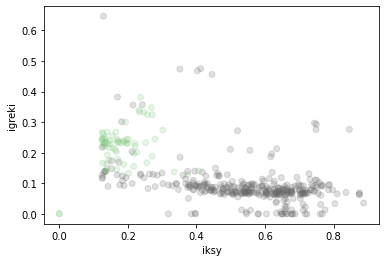

In [11]:
plt.scatter(data['Flickering'], data['Noise'], alpha=0.2, c = target['Category'], cmap='Accent')
plt.xlabel('iksy')
plt.ylabel('igreki')

In [14]:
df = pd.DataFrame()

In [15]:
df = data
df['Category'] = target['Category']

In [16]:
df.head(10)

,Blockiness,SA,Blockloss,Blur,TA,Exposure,Contrast,Noise,Slice,Flickering,Category
0,0.420239,0.179627,0.163113,0.665495,0.042524,0.545950,0.602629,0.243211,0.094779,0.201723,0
1,0.438120,0.745824,0.035076,0.453690,0.092480,0.552964,0.629697,0.229865,0.098284,0.199516,0
2,0.349282,0.584025,0.005737,0.516652,0.084288,0.552314,0.441798,0.232383,0.118241,0.181310,0
3,0.418623,0.631862,0.003654,0.470224,0.088398,0.563380,0.544888,0.234342,0.187917,0.171461,0
4,0.409510,0.360716,0.065364,0.502516,0.057878,0.553991,0.442137,0.147559,0.175424,0.137817,0
5,0.465047,0.221501,0.057905,0.581873,0.052544,0.521542,0.609689,0.167059,0.052793,0.255638,0
6,0.666516,0.000045,0.000000,0.002906,0.000178,0.032864,0.000109,0.001336,0.034055,0.000000,0
7,0.393279,0.400737,0.011405,0.598612,0.139385,0.561336,0.397514,0.233382,0.068487,0.134011,0
8,0.461755,0.291107,0.474303,0.516262,0.357118,0.608234,0.392475,0.244254,0.193960,0.279689,0
9,0.428853,0.590756,0.131719,0.469517,0.095856,0.549296,0.515157,0.239556,0.092700,0.147294,0


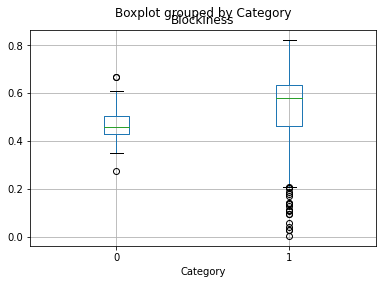

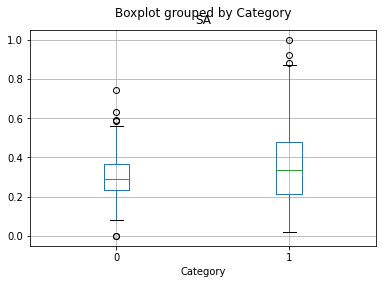

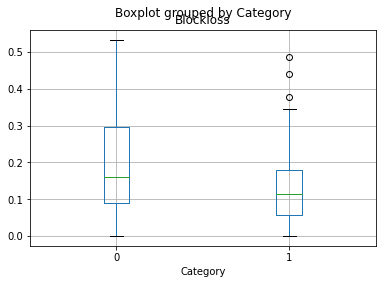

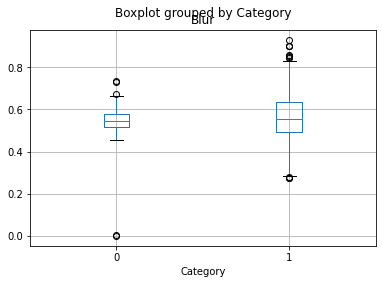

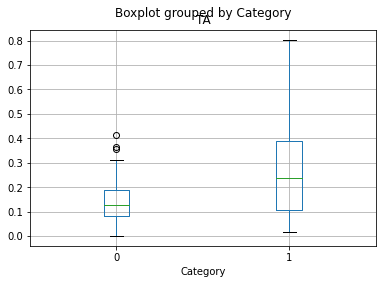

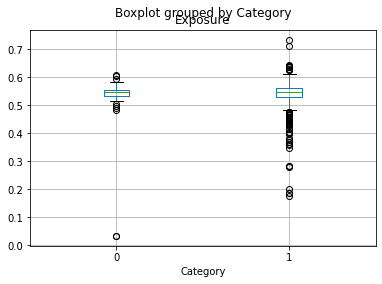

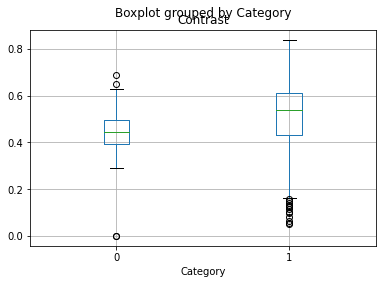

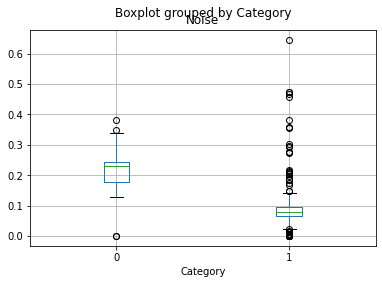

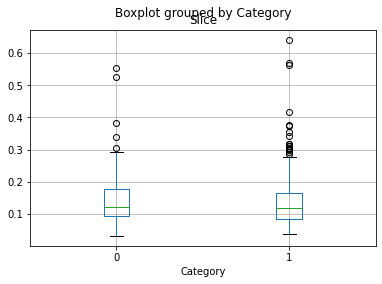

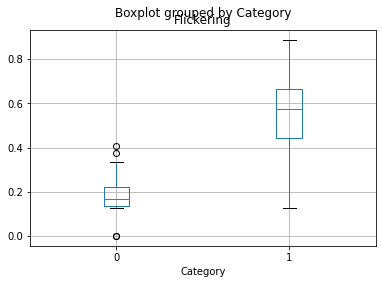

In [17]:
for c in columns_name:
    df.boxplot(column = c, by = 'Category')

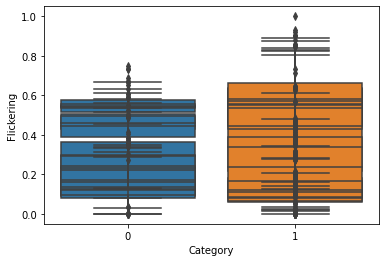

In [18]:
import seaborn as sns
for c in columns_name:
    sns.boxplot(x = 'Category' , y = c , data = df)

In [19]:
corr = df.corr()
corr #may be removed: Exposure, Slice

,Blockiness,SA,Blockloss,Blur,TA,Exposure,Contrast,Noise,Slice,Flickering,Category
Blockiness,1.000000,0.253282,-0.121343,0.039898,0.049047,0.083643,0.295906,0.034148,0.054323,-0.010222,0.162649
SA,0.253282,1.000000,-0.156659,-0.417076,0.527238,0.324098,0.523094,0.013274,0.099260,-0.019566,0.107950
Blockloss,-0.121343,-0.156659,1.000000,0.316572,0.242093,0.147614,0.067854,0.109404,0.006180,-0.100925,-0.272613
Blur,0.039898,-0.417076,0.316572,1.000000,0.072492,0.192609,0.075195,-0.035790,-0.115167,0.076929,0.102093
TA,0.049047,0.527238,0.242093,0.072492,1.000000,0.295020,0.389430,-0.118689,-0.016976,-0.015335,0.247316
Exposure,0.083643,0.324098,0.147614,0.192609,0.295020,1.000000,0.473404,0.191233,0.125773,-0.021707,0.021512
Contrast,0.295906,0.523094,0.067854,0.075195,0.389430,0.473404,1.000000,-0.128152,0.172313,0.154672,0.174856
Noise,0.034148,0.013274,0.109404,-0.035790,-0.118689,0.191233,-0.128152,1.000000,0.044559,-0.559455,-0.547882
Slice,0.054323,0.099260,0.006180,-0.115167,-0.016976,0.125773,0.172313,0.044559,1.000000,0.034258,-0.050791
Flickering,-0.010222,-0.019566,-0.100925,0.076929,-0.015335,-0.021707,0.154672,-0.559455,0.034258,1.000000,0.662429


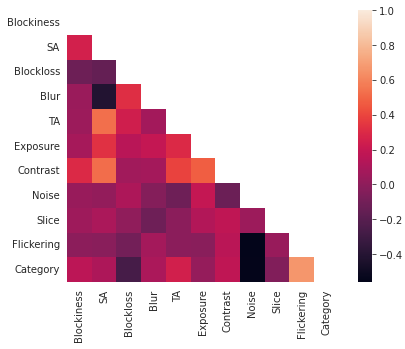

In [20]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [21]:
df2 = df.iloc[:,0:-1]
df2

,Blockiness,SA,Blockloss,Blur,TA,Exposure,Contrast,Noise,Slice,Flickering
0,0.420239,0.179627,0.163113,0.665495,0.042524,0.545950,0.602629,0.243211,0.094779,0.201723
1,0.438120,0.745824,0.035076,0.453690,0.092480,0.552964,0.629697,0.229865,0.098284,0.199516
2,0.349282,0.584025,0.005737,0.516652,0.084288,0.552314,0.441798,0.232383,0.118241,0.181310
3,0.418623,0.631862,0.003654,0.470224,0.088398,0.563380,0.544888,0.234342,0.187917,0.171461
4,0.409510,0.360716,0.065364,0.502516,0.057878,0.553991,0.442137,0.147559,0.175424,0.137817
...,...,...,...,...,...,...,...,...,...,...
403,0.643511,0.220159,0.155137,0.783322,0.170446,0.564530,0.465255,0.087841,0.127291,0.453681
404,0.261766,0.292153,0.127119,0.538228,0.239170,0.605438,0.690878,0.080456,0.092198,0.655548
405,0.523344,0.210550,0.118184,0.609717,0.087945,0.538488,0.659227,0.066612,0.353515,0.717053
406,0.483244,0.337183,0.200055,0.575140,0.312256,0.514261,0.528830,0.061367,0.128464,0.602911


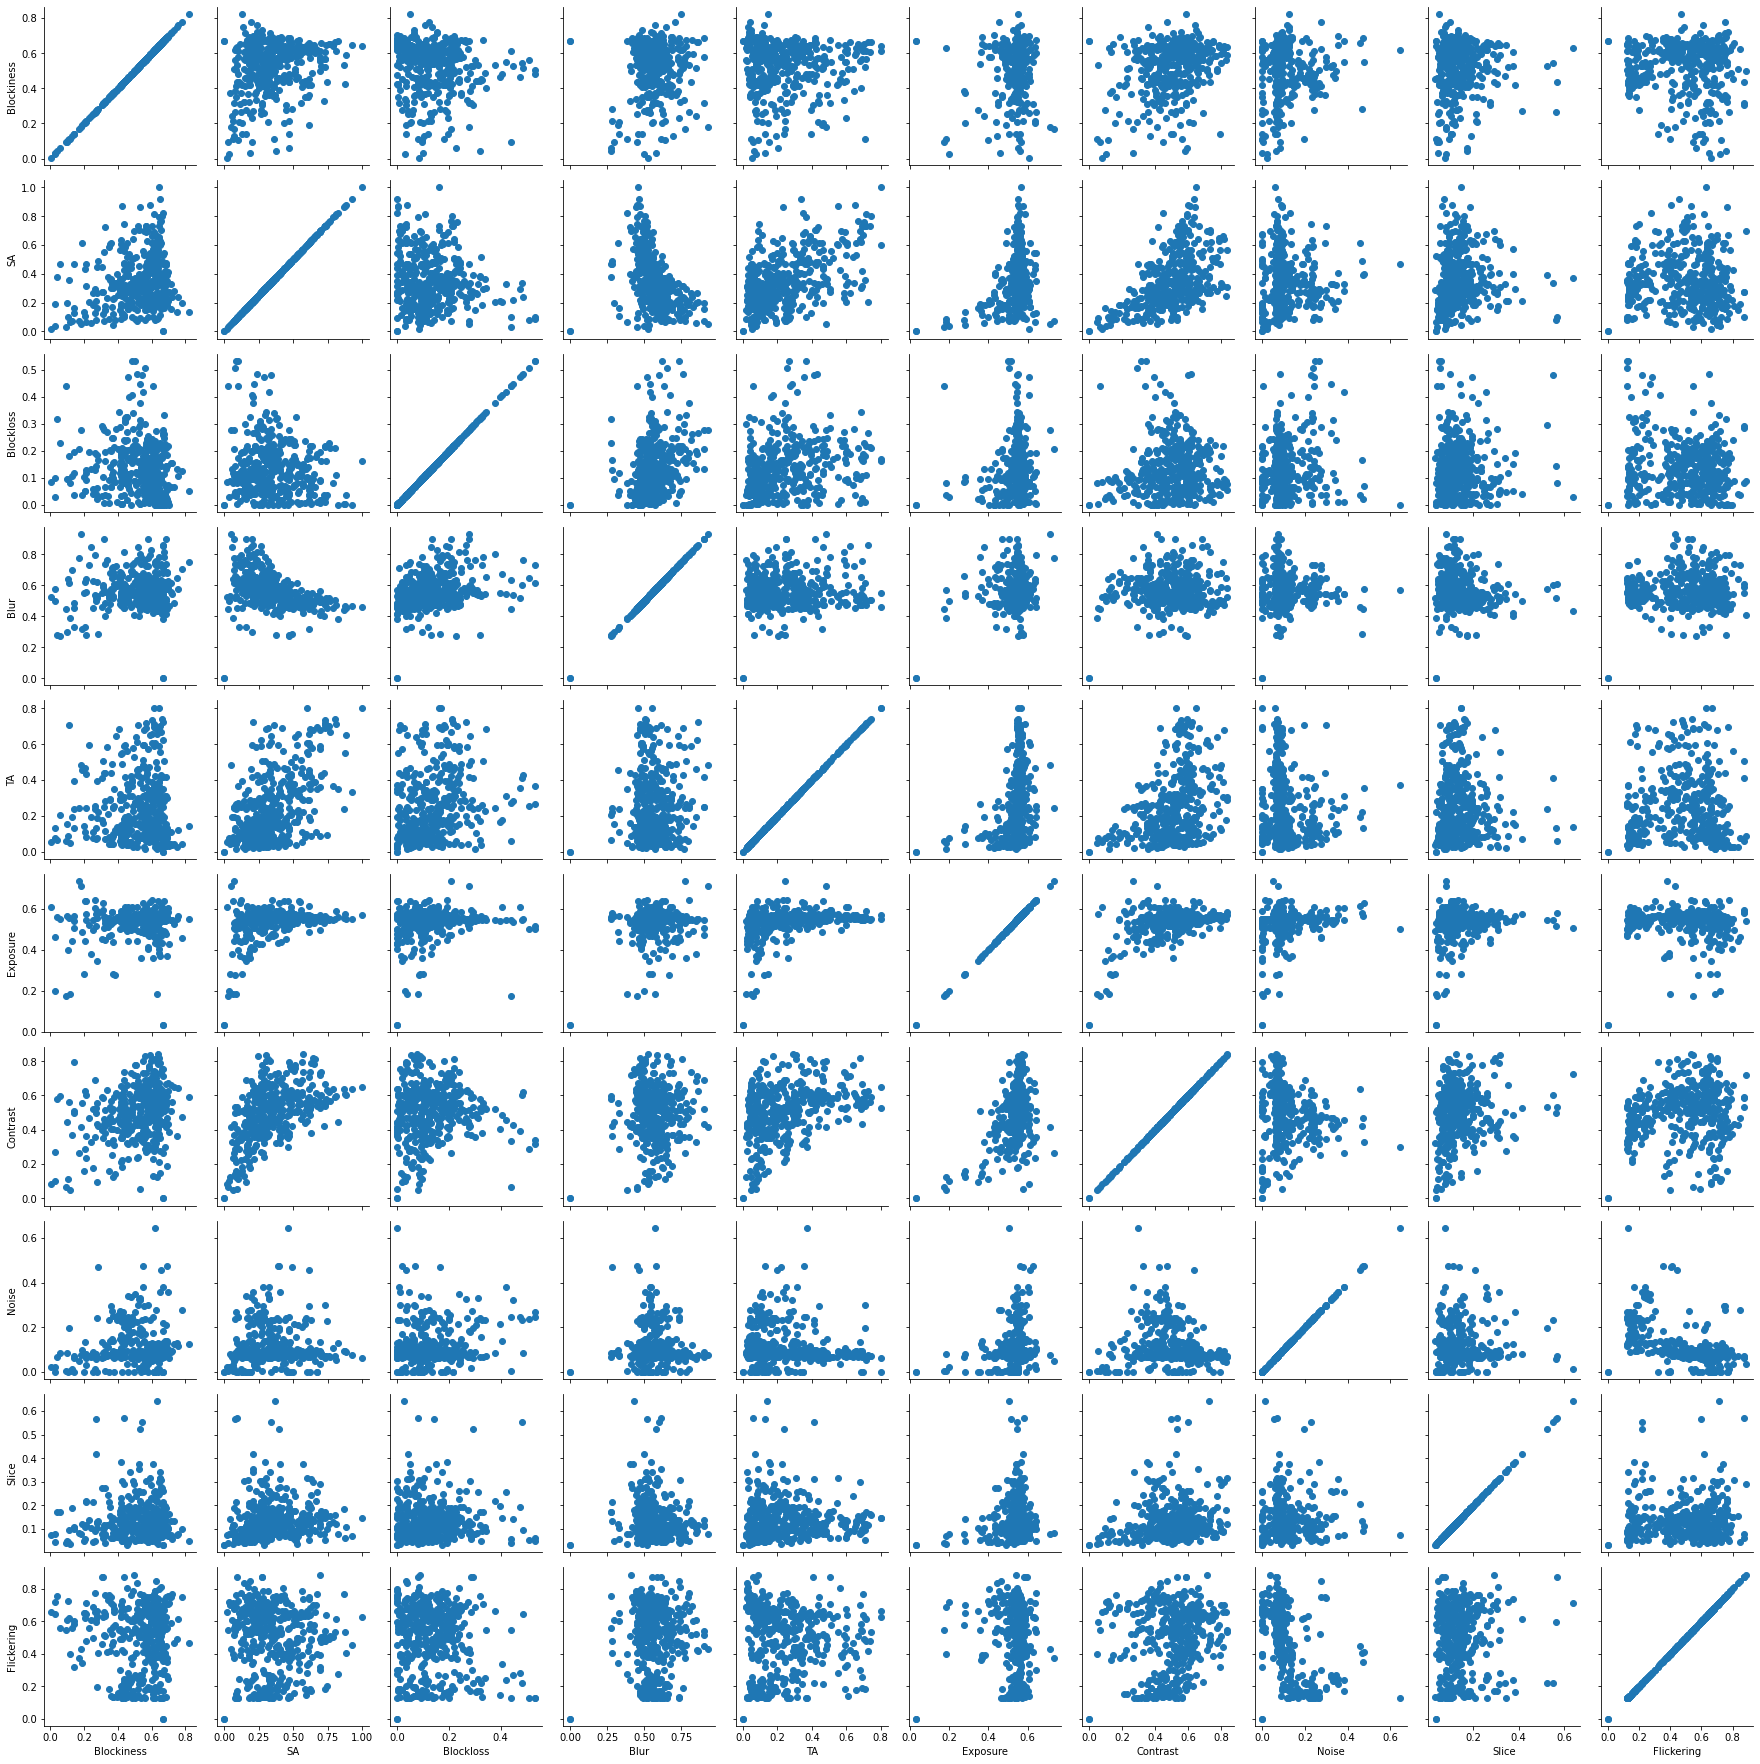

In [25]:
g = sns.PairGrid(df2)
g.map(plt.scatter)

In [23]:
X = data.iloc[:,0:-1]
Y = target

X.shape

(408, 10)

In [24]:
Y.shape

(408, 1)

In [25]:
model = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [26]:
list(zip(data.columns,model.feature_importances_))

[('Blockiness', 0.07162166271361677),
 ('SA', 0.0),
 ('Blockloss', 0.04132495590828924),
 ('Blur', 0.0),
 ('TA', 0.028747795414462096),
 ('Exposure', 0.0),
 ('Contrast', 0.0),
 ('Noise', 0.6467164612029317),
 ('Slice', 0.04210576521850114),
 ('Flickering', 0.16948335954219915)]

In [27]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [28]:
Y_test

,Category
13,0
212,1
22,0
44,0
369,1
...,...
178,1
100,1
54,0
310,1


In [29]:
round(model.score(X_test,Y_test),3)

0.951

In [32]:
from dtreeviz.trees import dtreeviz

In [33]:
viz = dtreeviz(
    model,
    X_test,
    Y_test,
    class_names=['PGC', 'UGC']
)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [33]:
model_forest = RandomForestClassifier()
X = data.iloc[:,0:-1]
Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model_forest.fit(X_train,Y_train)
list(zip(data.columns,model.feature_importances_))

C:\Users\user_amp_107\AppData\Local\Temp\ipykernel_17436\3178964179.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train,Y_train)


[('Blockiness', 0.0),
 ('SA', 0.0),
 ('Blockloss', 0.08687620110793018),
 ('Blur', 0.0),
 ('TA', 0.048812834224598936),
 ('Exposure', 0.0),
 ('Contrast', 0.022715929346945385),
 ('Noise', 0.6158188086244736),
 ('Slice', 0.06838227287764592),
 ('Flickering', 0.15739395381840596)]

In [34]:
model_forest.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [74]:
Y_test

,Category
393,1
2,0
67,0
72,1
316,1
...,...
113,1
25,0
193,1
12,0


In [84]:
round(model_forest.score(X_test,Y_test),5)

0.97561

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, model_forest.predict(X_test))

0.9634146341463414

In [36]:
accuracy_score(Y_test, model_forest.predict(X_test), normalize = False)

79

In [37]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test,model_forest.predict(X_test))

0.958904109589041

In [38]:
from sklearn.metrics import f1_score
f1_score(Y_test,model_forest.predict(X_test), average = 'binary')

0.9790209790209791

In [39]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test,model_forest.predict(X_test), average = 'binary')

(0.958904109589041, 1.0, 0.9790209790209791, None)

In [40]:
from sklearn.metrics import recall_score
recall_score(Y_test,model_forest.predict(X_test), average = 'binary')

1.0

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [88]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [89]:
mod = RandomForestClassifier()

In [91]:
mod_random = RandomizedSearchCV(estimator = mod, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [92]:
mod_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\users\user_amp_107\pycharmprojects\imageanalysis\venv\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [93]:
mod_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [94]:
best_random = mod_random.best_estimator_

In [95]:
f1_score(Y_test,best_random.predict(X_test), average = 'binary')

0.9922480620155039

In [96]:
accuracy_score(Y_test, best_random.predict(X_test))

0.9878048780487805